# Homework: Sentiment Analysis with Yelp Review Dataset


## What is the Yelp Dataset?

This dataset is derived from Yelp reviews, where each review expresses a sentiment (1 to 5 stars) about a particular service, product, or experience. The task focuses on analyzing these reviews to extract the sentiment conveyed.





##  Motivation

Yelp is a platform where users share their experiences and opinions about various businesses, such as restaurants, stores, and services. By analyzing these reviews, we can gain insights into customer satisfaction, identify trends in consumer behavior, and understand the general perception of different businesses. This analysis can be valuable for businesses aiming to improve their services based on customer feedback.


## Problem Statement

The task is to classify each review based on its star rating, ranging from 1 to 5 stars, reflecting the sentiment expressed by the user.
This analysis will help understand the general perception of various businesses and services based on user feedback, providing valuable insights into
customer satisfaction and areas for improvement for businesses.



## Dataset Information

The Yelp dataset consists of two files:

- `yelp_review_train`: Training dataset containing labeled reviews for model training.
- `yelp_review_test`: Validation dataset for evaluating the model's performance on unseen data.

Each review is associated with a `label` ranging from 0 to 4, where:
- `label 0`: 1 star
- `label 1`: 2 stars
- `label 2`: 3 stars
- `label 3`: 4 stars
- `label 4`: 5 stars

https://huggingface.co/datasets/Yelp/yelp_review_full

The code provided below (Chapter 2) includes a step to map these labels to their corresponding star ratings for better interpretability.

## Additional Notes

* Ensure all models and visualizations are well-commented.
* Include all explanations for key steps like tokenization, vectorization, hyperparameter tuning, model selection and performance.
* Please complete your homework using this notebook.
* We recommend using Google Colab for your project and exploring the Hugging Face platform.

## 1 - Import Libraries

Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful):

*   Pandas
*   Numpy
*   Sklearn
*   nltk
*   keras

## 2 - Importing the Data (60 points)

## 2.1 - Loading the Data


*   You can easly import datasets from Hugging Face platform


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets from the Hugging Face datasets library
splits = {'train': 'yelp_review_full/train-00000-of-00001.parquet',
          'test': 'yelp_review_full/test-00000-of-00001.parquet'}

train_df = pd.read_parquet("hf://datasets/Yelp/yelp_review_full/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/Yelp/yelp_review_full/" + splits["test"])

# Create a 20% subset from the train DataFrame
train_df, _ = train_test_split(train_df, test_size=0.8, stratify=train_df['label'], random_state=42)

# Split the 20% subset from train_df into training and validation (80% train, 20% validation)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# Create a 20% subset from the test DataFrame
test_df, _ = train_test_split(test_df, test_size=0.8, stratify=test_df['label'], random_state=42)

# Map labels to star ratings
label_to_star = {0: '1 star', 1: '2 stars', 2: '3 stars', 3: '4 stars', 4: '5 stars'}
train_df['star_rating'] = train_df['label'].map(label_to_star)
val_df['star_rating'] = val_df['label'].map(label_to_star)
test_df['star_rating'] = test_df['label'].map(label_to_star)

# Display the first few rows to confirm the mapping
print(train_df.head())
print(val_df.head())
print(test_df.head())

c:\Users\MSI-NB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        label                                               text star_rating
436956      4  My girlfriend drug me there. I didn't get any ...     5 stars
37450       3  It's a Denny's. In the mornings it's pretty pa...     4 stars
201202      3  We take the kids to Shark Reef about once a ye...     4 stars
166622      3  We stayed at Treasure Island for two nights an...     4 stars
91055       2  The waffle here was great. It had a unique tas...     3 stars
        label                                               text star_rating
312642      0  Thief's! THEY STOLE $20 FROM MY CAR!\n\nI've n...      1 star
289861      4  I highly recommend buying tickets to see the s...     5 stars
549215      1  Two stars for service other than that not wort...     2 stars
591355      2  All I can give them is they are big. Gas price...     3 stars
347833      4  Definitely one of the best meals we have had i...     5 stars
       label                                               text star_rating


## 2.2 - Exploratory Data Analysis (EDA) (20 points)

Please investigate your data according to 'label' or 'length_category_for_eda' columns:
* Check distributions. Visualize the data distribution across length of text categories (very short to very long).
* Check null values.
* Analyze the relationship between text length and labels.
* Create word clouds for frequently used words in each category of positive, negative, and neutral reviews.(1,2 stars negative ; 3 neutral ; 4,5 positive reviews)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

def categorize_text_length_extended(length):
    if length <= 300:
        return "very short"
    elif 301 <= length <= 600:
        return "short"
    elif 601 <= length <= 900:
        return "medium"
    elif 901 <= length <= 1200:
        return "long"
    else:
        return "very long"

# Adding a new column for text length (number of characters) and categorizing it with the extended categories
train_df['text_length'] = train_df['text'].apply(len)
train_df['length_category_for_eda'] = train_df['text_length'].apply(categorize_text_length_extended)

# Adding a new column for text length (number of characters) and categorizing it with the extended categories
test_df['text_length'] = test_df['text'].apply(len)
test_df['length_category_for_eda'] = test_df['text_length'].apply(categorize_text_length_extended)

2.2.1 - Visualizing the data distribution across text length categories

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_13136\3548576207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='length_category_for_eda', data=train_df, palette='viridis')


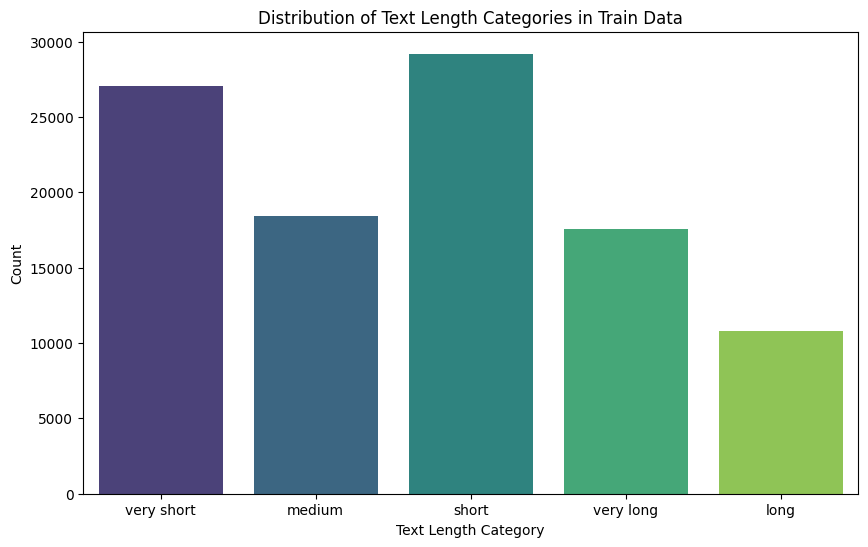

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_13136\3548576207.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='muted')


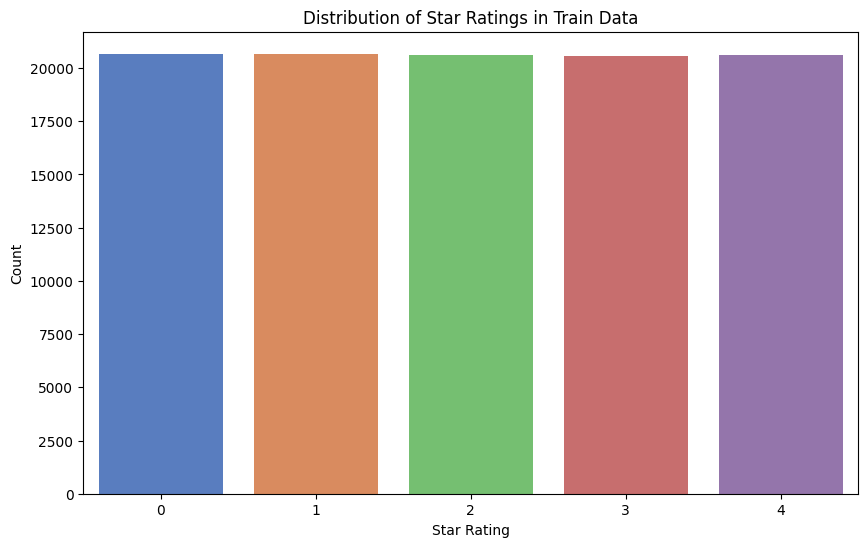

In [10]:
# Plot the distribution of text length categories in the training data
plt.figure(figsize=(10, 6))
sns.countplot(x='length_category_for_eda', data=train_df, palette='viridis')
plt.title('Distribution of Text Length Categories in Train Data')
plt.xlabel('Text Length Category')
plt.ylabel('Count')
plt.show()

# Plot the distribution of labels (star ratings) in the training data
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df, palette='muted')
plt.title('Distribution of Star Ratings in Train Data')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

2.2.2 - Checking Null Values

In [11]:
print("Null values in Train Data:")
print(train_df.isnull().sum())

print("\nNull values in Validation Data:")
print(val_df.isnull().sum())

print("\nNull values in Test Data:")
print(test_df.isnull().sum())

# If there are any null values, handle them by either dropping or filling (here we'll just drop)
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

Null values in Train Data:
label                      0
text                       0
star_rating                0
language                   0
clean_text                 0
tokenized_text             0
lemmatized_text            0
word_count                 0
text_length                0
length_category_for_eda    0
dtype: int64

Null values in Validation Data:
label              0
text               0
star_rating        0
language           0
clean_text         0
tokenized_text     0
lemmatized_text    0
word_count         0
dtype: int64

Null values in Test Data:
label                      0
text                       0
star_rating                0
language                   0
clean_text                 0
tokenized_text             0
lemmatized_text            0
word_count                 0
text_length                0
length_category_for_eda    0
dtype: int64


2.2.3 - Analyzing the relationship between text length and labels

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_13136\920349214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=train_df, palette='Set3')


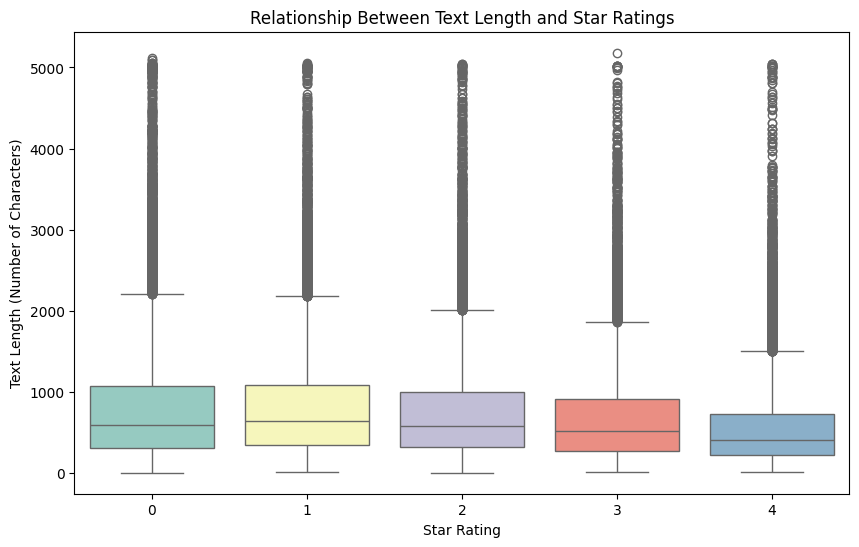

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=train_df, palette='Set3')
plt.title('Relationship Between Text Length and Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Text Length (Number of Characters)')
plt.show()

2.2.4 - Creating word clouds for frequently used words in each category of reviews

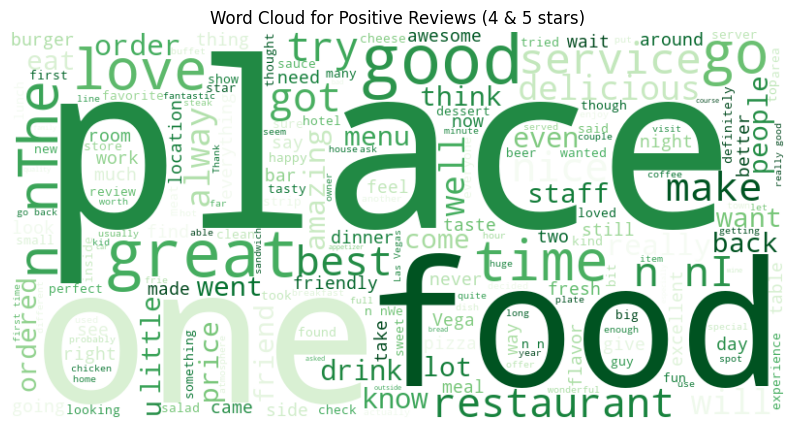

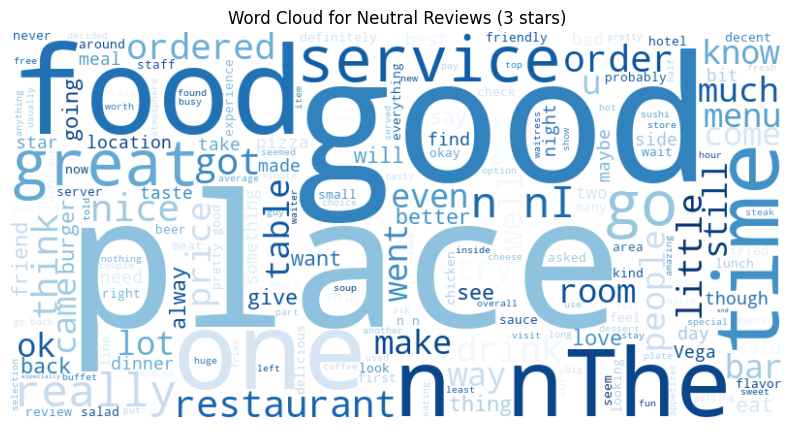

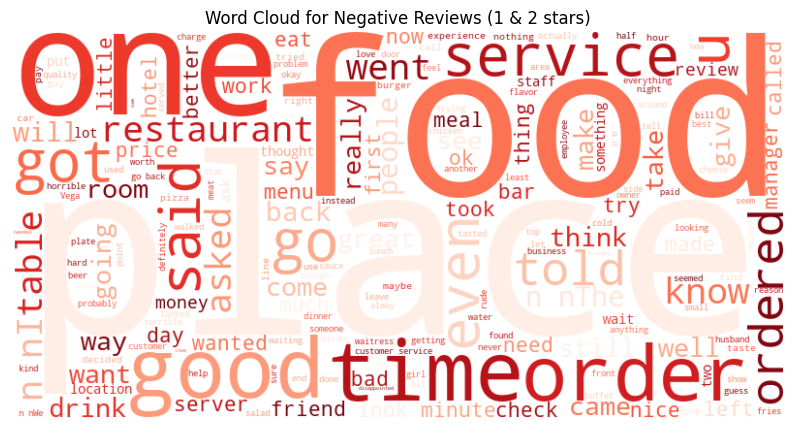

In [6]:
# Positive Reviews (4 and 5 stars)
positive_reviews = train_df[train_df['label'].isin([3, 4])]['text']
positive_text = ' '.join(positive_reviews)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews (4 & 5 stars)')
plt.show()

# Neutral Reviews (3 stars)
neutral_reviews = train_df[train_df['label'] == 2]['text']
neutral_text = ' '.join(neutral_reviews)

wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews (3 stars)')
plt.show()

# Negative Reviews (1 and 2 stars)
negative_reviews = train_df[train_df['label'].isin([0, 1])]['text']
negative_text = ' '.join(negative_reviews)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (1 & 2 stars)')
plt.show()

## 2.3 - Data Preparation (25 points)

* Clean the comments. Remove irrelevant characters (e.g., URLs, mentions). Normalize the text (lowercasing, removing punctuation, etc.).
* Remove/unremove stopwords based on your assumption.
* Tokenize the comments.
* Lemmatize the comments.
* Vectorization.
* Word count analysis and outlier detection.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from langdetect import detect, LangDetectException

nltk.download('all')

from langdetect import detect, LangDetectException

# While dealing with the data, we noticed that there were non-english comments. 
# In order to work more efficiently, we decided to remove this non-english comments from the data
# Detecting and removing Non-English comments
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Adding language detection to datasets
for df in [train_df, val_df, test_df]:
    df['language'] = df['text'].apply(detect_language)

# Filtering only English comments
train_df = train_df[train_df['language'] == 'en']
val_df = val_df[val_df['language'] == 'en']
test_df = test_df[test_df['language'] == 'en']

# Resetting index after filtering
for df in [train_df, val_df, test_df]:
    df.reset_index(drop=True, inplace=True)

# Print the number of reviews after filtering
print(f"Number of English reviews in training data: {len(train_df)}")
print(f"Number of English reviews in validation data: {len(val_df)}")
print(f"Number of English reviews in test data: {len(test_df)}")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\MSI-
[nltk_data]    |     NB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\MSI-
[nltk_data]    |     NB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\MSI-NB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\MSI-NB\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\MSI-NB\AppData\Roaming\nltk_da

Number of English reviews in training data: 103101
Number of English reviews in validation data: 25798
Number of English reviews in test data: 9932


2.3.1 - Cleaning the comments - Removing URLs, mentions, and normalizing text

In [28]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Removing URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Removing mentions and hashtags
    text = text.lower()  # Normalizing to lowercase
    text = re.sub(r'[^\w\s]', ' ', text)  # Removing punctuation but replace with space to avoid word concatenation
    text = re.sub(r'\d+', '', text)  # Removing digits
    text = re.sub(r'\s+', ' ', text).strip()  # Removing extra whitespace
    return text

train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)


2.3.2 - Removing stopwords

In [29]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply stopword removal
train_df['clean_text'] = train_df['clean_text'].apply(remove_stopwords)
val_df['clean_text'] = val_df['clean_text'].apply(remove_stopwords)
test_df['clean_text'] = test_df['clean_text'].apply(remove_stopwords)

2.3.3 - Tokenizing the comments

In [30]:
train_df['tokenized_text'] = train_df['clean_text'].apply(word_tokenize)
val_df['tokenized_text'] = val_df['clean_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['clean_text'].apply(word_tokenize)

2.3.4 - Lemmatizing the comments

In [31]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Applying lemmatization
train_df['lemmatized_text'] = train_df['tokenized_text'].apply(lemmatize_words)
val_df['lemmatized_text'] = val_df['tokenized_text'].apply(lemmatize_words)
test_df['lemmatized_text'] = test_df['tokenized_text'].apply(lemmatize_words)

2.3.5 - Vectorization

In [32]:
count_vectorizer = CountVectorizer(max_features=5000) 
train_bow = count_vectorizer.fit_transform(train_df['clean_text'])
val_bow = count_vectorizer.transform(val_df['clean_text'])
test_bow = count_vectorizer.transform(test_df['clean_text'])

2.3.6 - Word count analysis and outlier detection

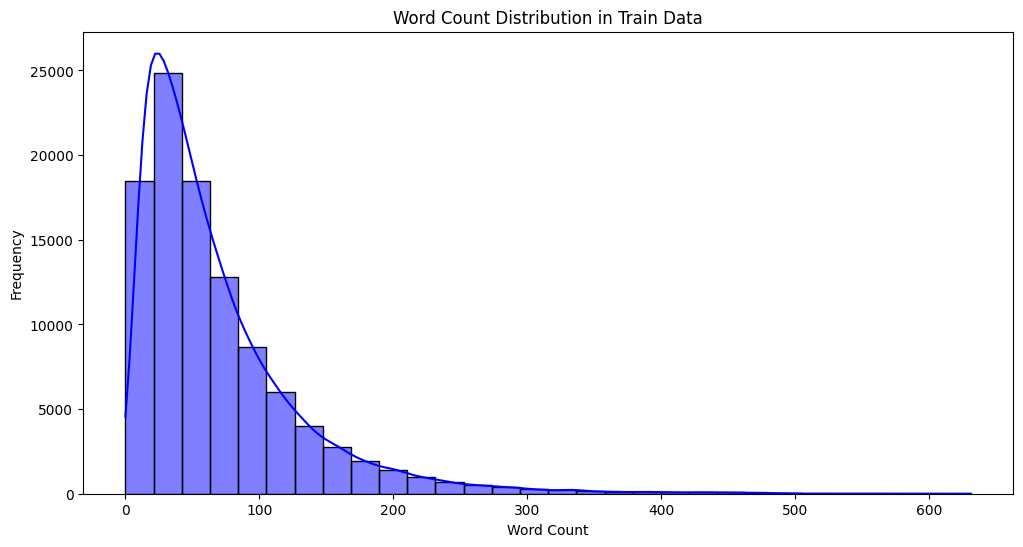

Number of outlier reviews (based on word count) in training data: 5602
Examples of outlier reviews:
24    southern california undoubtedly makes hugest s...
31    impressed scheduled first appointment everyone...
52    brenda daughter took us mon ami gabi sunday br...
73    got work late night around wednesday december ...
88    visits lunch n nbefore start say star chinese ...
Name: clean_text, dtype: object


In [33]:
train_df['word_count'] = train_df['clean_text'].apply(lambda x: len(x.split()))
val_df['word_count'] = val_df['clean_text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))

# Histogram for word count distribution
sns.histplot(train_df['word_count'], kde=True, color='blue', bins=30)
plt.title('Word Count Distribution in Train Data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Finding outliers based on word count - Define outliers using the IQR rule
Q1 = train_df['word_count'].quantile(0.25)
Q3 = train_df['word_count'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers = train_df[train_df['word_count'] > outlier_threshold]
print(f"Number of outlier reviews (based on word count) in training data: {len(outliers)}")

# Displaying a few outlier examples
print("Examples of outlier reviews:")
print(outliers['clean_text'].head())

## 2.4 - TF(Term Frequency) - IDF(Inverse Document Frequency) (15 points)

* Explain TF & IDF.
* Apply TF & IDF methods.

Explanation of TF & IDF
- TF (Term Frequency): Represents how frequently a term appears in a document.
- IDF (Inverse Document Frequency): Represents the importance of a term in the whole dataset by reducing the weight of frequently occurring words.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Applying TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])
val_tfidf = tfidf_vectorizer.transform(val_df['clean_text'])
test_tfidf = tfidf_vectorizer.transform(test_df['clean_text'])

# Displaying some of the features after vectorization
print("Some features extracted using TF-IDF:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

Some features extracted using TF-IDF:
['ability' 'able' 'absolute' 'absolutely' 'ac' 'accent' 'accept'
 'acceptable' 'accepted' 'access' 'accessible' 'accessories' 'accident'
 'accidentally' 'accommodate' 'accommodating' 'accompanied' 'accompanying'
 'according' 'accordingly']


# 3 - Training Deep Learning Models (30 Points)

* Import relevant libraries.
* Explain the differences between Neural Networks (NN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN).

Neural Networks (NN):
- Consist of an input layer, one or more hidden layers, and an output layer.
- They are fully connected layers where each neuron in one layer is connected to every neuron in the next layer.
- Useful for a variety of tasks including classification and regression.

Convolutional Neural Networks (CNN):
- Specifically designed for image data and structured input.
- Use convolutional layers to automatically learn spatial hierarchies of features.
- Best suited for computer vision tasks like image classification, object detection, etc.

Recurrent Neural Networks (RNN):
- Designed for sequence data where order matters.
- Incorporate loops to maintain information through time (i.e., sequences).
- Commonly used for time series analysis, language modeling, and natural language processing.

In [35]:
# Separating features and target for training, validation, and test sets
# Training set
X_train = train_tfidf
y_train = train_df['label']  

# Validation set
X_val = val_tfidf
y_val = val_df['label']

# Test set
X_test = test_tfidf
y_test = test_df['label']

# Display the first few rows of target labels to verify
print(y_train.head())
print(y_val.head())
print(y_test.head())


0    4
1    3
2    3
3    3
4    2
Name: label, dtype: int64
0    0
1    4
2    1
3    2
4    4
Name: label, dtype: int64
0    0
1    0
2    4
3    2
4    0
Name: label, dtype: int64


## 3.1 - Training NN Model

* Construct models starting from a simple neural network (NN) with a single layer, and incrementally add layers to build more complex architectures. Analyze the performance differences among them.
* Experiment with different activation functions, optimizers, and regularization techniques (such as dropout rates). For each trial, document the effects of these changes. For example, observe how adding or removing layers, changing activation functions, or adjusting dropout rates impacts performance.
* Tune hyperparameters like learning rate, number of layers, and dropout percentage. Explain how each adjustment affects overfitting, underfitting, and generalization on the test data.

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the input features using MaxAbsScaler (works well with sparse data)
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define function to train a neural network model
def train_nn_model_sparse(X_train, y_train, X_val, y_val, layers, activations, dropout_rates, optimizer, learning_rate, epochs=20, batch_size=32):
    # Ensure that the parameters are valid
    assert len(layers) == len(activations), "The number of layers must match the number of activations."
    if len(layers) > 1:
        assert len(dropout_rates) == len(layers) - 1 or len(dropout_rates) == 0, "The number of dropout rates must match the number of hidden layers."

    # Build the model
    model = Sequential()
    input_dim = X_train.shape[1]
    model.add(Input(shape=(input_dim,)))  # Add Input layer to define the input shape
    model.add(Dense(layers[0], activation=activations[0]))

    for i in range(1, len(layers)):
        if dropout_rates:
            model.add(Dropout(dropout_rates[i - 1]))  # Adding dropout if provided
        model.add(Dense(layers[i], activation=activations[i]))

    num_classes = len(np.unique(y_train))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for classification

    # Define optimizer based on parameter
    opt = Adam(learning_rate=learning_rate) if optimizer == "adam" else SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        callbacks=[early_stop]
    )
    
    return model, history

# Train and evaluate revised Model 1 (Single-layer NN with reduced dropout)
model1, history1 = train_nn_model_sparse(
    X_train, y_train, X_val, y_val,
    layers=[128],                       # Increased units to 128 for better learning capability
    activations=["relu"],               # Activation: ReLU
    dropout_rates=[0.2],                # Lowered dropout rate to retain more learned features
    optimizer="adam",                   # Optimizer: Adam
    learning_rate=0.001,                # Lower learning rate for smoother convergence
    epochs=20,                          # Increased epochs
    batch_size=64                       # Batch size
)

# Train and evaluate revised Model 2 (Two-layer NN)
model2, history2 = train_nn_model_sparse(
    X_train, y_train, X_val, y_val,
    layers=[256, 128],                  # Increased units to improve model capacity
    activations=["relu", "relu"],       # Activation: ReLU for both layers
    dropout_rates=[0.2],                # Dropout rate after first hidden layer
    optimizer="adam",                   # Optimizer: Adam
    learning_rate=0.0005,               # Lowered learning rate for more precise updates
    epochs=30,                          # Increased number of epochs
    batch_size=32                       # Batch size
)

# Train and evaluate revised Model 3 (Three-layer NN with lowered learning rate for SGD)
model3, history3 = train_nn_model_sparse(
    X_train, y_train, X_val, y_val,
    layers=[256, 128, 64],              # Increased units for better representation learning
    activations=["tanh", "relu", "relu"], # Activation: Tanh for first, ReLU for others
    dropout_rates=[0.2, 0.3],           # Reduced dropout rates
    optimizer="sgd",                    # Optimizer: SGD for different optimization approach
    learning_rate=0.001,                # Reduced learning rate for stability
    epochs=50,                          # More epochs for better training (with early stopping)
    batch_size=64                       # Batch size
)


Epoch 1/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5132 - loss: 1.1451 - val_accuracy: 0.5771 - val_loss: 0.9690
Epoch 2/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6189 - loss: 0.8966 - val_accuracy: 0.5757 - val_loss: 0.9747
Epoch 3/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6481 - loss: 0.8374 - val_accuracy: 0.5670 - val_loss: 0.9936
Epoch 4/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6890 - loss: 0.7606 - val_accuracy: 0.5603 - val_loss: 1.0301
Epoch 5/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7433 - loss: 0.6635 - val_accuracy: 0.5504 - val_loss: 1.0836
Epoch 6/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8015 - loss: 0.5506 - val_accuracy: 0.5431 - val_loss: 1.1659
Epoch 1/30
3222/3222 ━━━━━━━━━━━━━━━━━━━━ 57s 17ms/step - accuracy: 0.5077 - loss: 1.1283 - val_accuracy: 0.5776 - val_loss: 0.9697
Epoch 2/30
3222/3222 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - accuracy: 0.6265 - loss:

# 4 - Model Evaluation on the Validation Set (10 points)

* Evaluate the best model's performance on the validation set using a Confusion Matrix along with metrics such as accuracy, precision, recall, and F1-score. How well does the model generalize to new data based on these metrics?



The best model is Model 2 with a validation accuracy of 0.58
807/807 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.57764
Precision: 0.57688
Recall: 0.57764
F1 Score: 0.57566


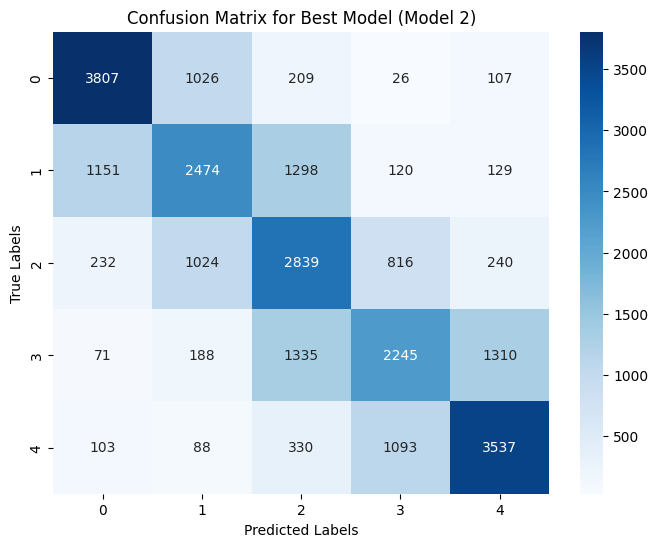

In [42]:
# Section 4 - Model Evaluation on the Validation Set

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Find the best model based on validation accuracy
models = [model1, model2, model3]
histories = [history1, history2, history3]

best_model_index = 0
best_val_accuracy = 0

# Iterate through each model's history to find the best validation accuracy
for i, history in enumerate(histories):
    val_accuracy = max(history.history['val_accuracy'])  # Get the best validation accuracy for the model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_index = i

best_model = models[best_model_index]
print(f"The best model is Model {best_model_index + 1} with a validation accuracy of {best_val_accuracy:.2f}")

# Predict the labels on the validation set
y_pred = best_model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)  # Convert predicted probabilities to class labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred_classes)
precision = precision_score(y_val, y_pred_classes, average='weighted')
recall = recall_score(y_val, y_pred_classes, average='weighted')
f1 = f1_score(y_val, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Best Model (Model {best_model_index + 1})')
plt.show()

## 4.1 - Testing with your Own Input

* You can test the trained model by inputting your own sentences to predict the sentiment:


In [55]:
def predict_sentiment(sentence, model, vectorizer, label_to_star):
    import numpy as np
    # Clean the input sentence
    cleaned_sentence = clean_text(sentence)  # Use the previously defined cleaning function
    cleaned_sentence_no_stopwords = remove_stopwords(cleaned_sentence)  # Remove stopwords for better analysis
    
    # Vectorize the cleaned sentence
    vectorized_input = vectorizer.transform([cleaned_sentence_no_stopwords])  # Convert the input text into vector format
    
    # Get the prediction from the model
    prediction = model.predict(vectorized_input)
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability
    predicted_star_rating = label_to_star[predicted_class]  # Map the predicted class to the corresponding star rating
    
    return predicted_star_rating, prediction

# Testing the function with a user input
sentence_1 = "The food and ambiance at this restaurant were fantastic!"  # Example review to test the model
predicted_star_rating, raw_predictions = predict_sentiment(sentence_1, best_model, tfidf_vectorizer, label_to_star)

# Print the result
print(f"The predicted sentiment for the review 1 is: {predicted_star_rating}")
print(f"Raw prediction probabilities: {raw_predictions}")

# Testing the function with a user input
sentence_2 = "The place was terrible!"  # Example review to test the model
predicted_star_rating, raw_predictions = predict_sentiment(sentence_2, best_model, tfidf_vectorizer, label_to_star)

# Print the result
print(f"The predicted sentiment for the review 2 is: {predicted_star_rating}")
print(f"Raw prediction probabilities: {raw_predictions}")

# Testing the function with a user input
sentence_3 = "The food was okay."  # Example review to test the model
predicted_star_rating, raw_predictions = predict_sentiment(sentence_3, best_model, tfidf_vectorizer, label_to_star)

# Print the result
print(f"The predicted sentiment for the review 3 is: {predicted_star_rating}")
print(f"Raw prediction probabilities: {raw_predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The predicted sentiment for the review 1 is: 5 stars
Raw prediction probabilities: [[0.01064356 0.02819546 0.11560673 0.32026795 0.5252863 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The predicted sentiment for the review 2 is: 1 star
Raw prediction probabilities: [[9.0736836e-01 8.3005860e-02 8.6812945e-03 5.8055820e-04 3.6401633e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The predicted sentiment for the review 3 is: 3 stars
Raw prediction probabilities: [[0.03336476 0.42188558 0.52853    0.01513516 0.00108451]]


# 5 - Bonus - Adding Transformer Layer to the NN Model (15 points)

* How can a transformer layer be added to the NN model created in Chapter 3. Research and implement a solution to add a transformer layer to the neural network model. Document your findings, including how the transformer layer integrates with the existing architecture, its impact on model performance, and any adjustments required. Explain your approach and reasoning based on your research.

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Dropout, Input, Reshape, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting number of features to avoid large matrices
train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])
val_tfidf = tfidf_vectorizer.transform(val_df['clean_text'])
test_tfidf = tfidf_vectorizer.transform(test_df['clean_text'])

# Create Transformer-based neural network model
def create_nn_with_transformer(input_dim, transformer_heads=4, transformer_key_dim=64, dense_units=128, dropout_rate=0.3):
    # Input layer
    inputs = Input(shape=(input_dim,))
    
    # Reshape the input to 3D for MultiHeadAttention (batch_size, seq_len, embedding_dim)
    reshaped_inputs = Dense(transformer_key_dim)(inputs)  # Transform input to compatible dimensions
    reshaped_inputs = Reshape((1, transformer_key_dim))(reshaped_inputs)  # Add sequence dimension (seq_len=1)
    
    # Transformer Encoder
    transformer_attention = MultiHeadAttention(num_heads=transformer_heads, key_dim=transformer_key_dim)(reshaped_inputs, reshaped_inputs)
    transformer_attention = LayerNormalization(epsilon=1e-6)(transformer_attention + reshaped_inputs)  # Residual connection
    
    # Flatten Transformer output to feed into Dense layers
    flattened_attention = Flatten()(transformer_attention)  # Convert 3D output to 2D for Dense layer
    
    # Fully Connected Layer after Transformer
    transformer_dense = Dense(dense_units, activation='relu')(flattened_attention)
    transformer_dense = Dropout(dropout_rate)(transformer_dense)
    
    # Output Layer
    outputs = Dense(5, activation='softmax')(transformer_dense)
    
    # Model
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the transformer-based neural network model
input_dim = train_tfidf.shape[1]  # TF-IDF output size
transformer_nn_model = create_nn_with_transformer(input_dim)

# Train the model
history_transformer = transformer_nn_model.fit(
    train_tfidf.toarray(),  # MultiHeadAttention does not support sparse tensors, so convert to dense array
    train_df['label'],
    validation_data=(val_tfidf.toarray(), val_df['label']),
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluate performance on the test data
test_loss_transformer, test_accuracy_transformer = transformer_nn_model.evaluate(test_tfidf.toarray(), test_df['label'])
print(f"Test Accuracy with Transformer Layer: {test_accuracy_transformer:.2f}")


Epoch 1/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.5016 - loss: 1.1374 - val_accuracy: 0.5692 - val_loss: 0.9872
Epoch 2/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5888 - loss: 0.9477 - val_accuracy: 0.5751 - val_loss: 0.9743
Epoch 3/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6082 - loss: 0.9145 - val_accuracy: 0.5735 - val_loss: 0.9793
Epoch 4/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6170 - loss: 0.8837 - val_accuracy: 0.5724 - val_loss: 0.9895
Epoch 5/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6280 - loss: 0.8489 - val_accuracy: 0.5657 - val_loss: 1.0340
Epoch 6/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6414 - loss: 0.8148 - val_accuracy: 0.5646 - val_loss: 1.0371
Epoch 7/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6518 - loss: 0.7840 - val_accuracy: 0.5584 - val_loss: 1.0679
Epoch 8/10
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6614 - 